In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [3]:
perfumes = pd.read_csv('data/Perfume_data.csv')# 향수 데이터
ratings = pd.read_csv('data/Perfume_review1.csv')# 향수 리뷰 데이터

In [4]:
rating_merge = pd.merge(ratings, perfumes,on="N_id")rating_merge

,N,PerfumeScore,N_id,N_User,Name,Company,Smell,Gender,Year,Img_URL
0,1,5,6,1,Capri,19-69,Aromatic,women and men,2017.0,https://fimgs.net/mdimg/perfume/375x500.53116.jpg
1,2,5,6,2,Capri,19-69,Aromatic,women and men,2017.0,https://fimgs.net/mdimg/perfume/375x500.53116.jpg
2,3,5,6,3,Capri,19-69,Aromatic,women and men,2017.0,https://fimgs.net/mdimg/perfume/375x500.53116.jpg
3,4,4,6,4,Capri,19-69,Aromatic,women and men,2017.0,https://fimgs.net/mdimg/perfume/375x500.53116.jpg
4,7,5,7,7,#Hashtag,27 87,Aromatic,women and men,2016.0,https://fimgs.net/mdimg/perfume/375x500.37889.jpg
...,...,...,...,...,...,...,...,...,...,...
431763,738078,2,56557,3901,Hyrax,Zoologist Perfumes,Woody Spicy,women and men,2018.0,https://fimgs.net/mdimg/perfume/375x500.49269.jpg
431764,738080,4,56557,14738,Hyrax,Zoologist Perfumes,Woody Spicy,women and men,2018.0,https://fimgs.net/mdimg/perfume/375x500.49269.jpg
431765,738081,4,56557,5972,Hyrax,Zoologist Perfumes,Woody Spicy,women and men,2018.0,https://fimgs.net/mdimg/perfume/375x500.49269.jpg
431766,738082,5,56557,5135,Hyrax,Zoologist Perfumes,Woody Spicy,women and men,2018.0,https://fimgs.net/mdimg/perfume/375x500.49269.jpg


In [5]:
matrix = rating_merge.pivot_table("PerfumeScore", index= "Smell",columns="N_User",aggfunc="mean")# 피봇 테이블 생성
matrix = matrix.fillna(0)# 평가가 없는 경우 0으로 채움
matrix_index = matrix.index

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(matrix)
PCA_matrix = pd.DataFrame(data=printcipalComponents, index = matrix_index, columns = ['x','y'])
PCA_matrix

,x,y
Smell,,
Aromatic,-61.604371,-25.555447
Aromatic Aquatic,-93.531782,-43.253734
Aromatic Fougere,-107.603373,47.816047
Aromatic Fruity,-64.807418,-66.288625
Aromatic Green,-81.363870,-56.531245
Aromatic Spicy,-82.202855,-26.209035
Chypre,-66.395650,-48.871529
Chypre Floral,95.987804,-45.594300
Chypre Fruity,-16.613822,-72.298441


In [7]:
main_meta_info_names = ['Aromatic','Chypre','Citrus','Floral','Leather','Oriental','Woody']
unique_colors = ['#70a800', '#c1007b', '#ffa500', '#ff66cc', '#8b4513', '#ff4500', '#8b4513']

In [8]:
main_meta = PCA_matrix[PCA_matrix.index.isin(main_meta_info_names)]
meta = PCA_matrix[~PCA_matrix.index.isin(main_meta_info_names)]
meta

,x,y
Smell,,
Aromatic Aquatic,-93.531782,-43.253734
Aromatic Fougere,-107.603373,47.816047
Aromatic Fruity,-64.807418,-66.288625
Aromatic Green,-81.363870,-56.531245
Aromatic Spicy,-82.202855,-26.209035
Chypre Floral,95.987804,-45.594300
Chypre Fruity,-16.613822,-72.298441
Citrus Aromatic,-38.850217,53.453809
Citrus Gourmand,-72.543187,-96.081002


In [8]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


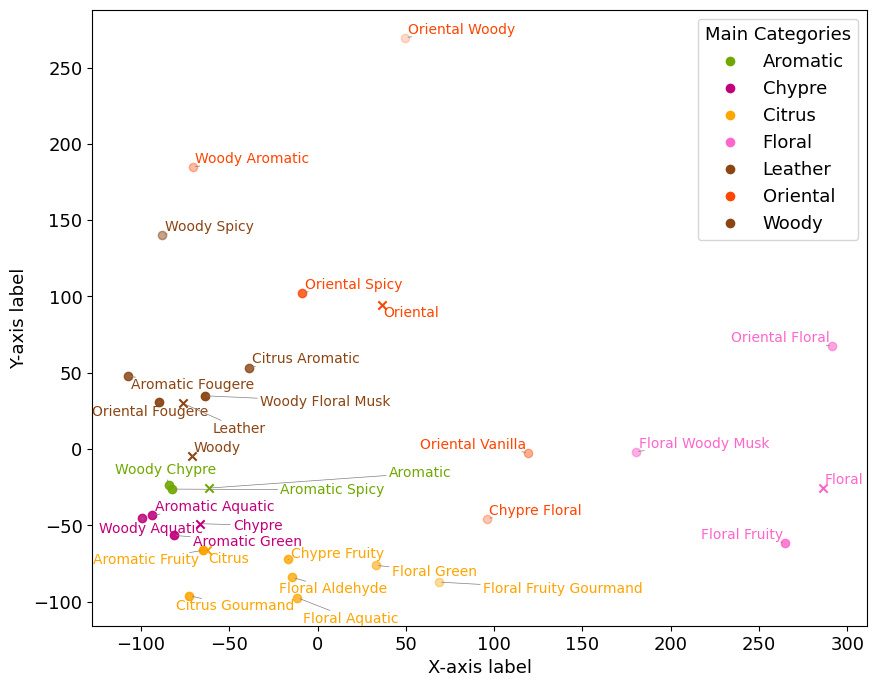

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from adjustText import adjust_text

main_meta_info_names = ['Aromatic','Chypre','Citrus','Floral','Leather','Oriental','Woody']
unique_colors = ['#70a800', '#c1007b', '#ffa500', '#ff66cc', '#8b4513', '#ff4500', '#8b4513']

main_meta = PCA_matrix[PCA_matrix.index.isin(main_meta_info_names)]
meta = PCA_matrix[~PCA_matrix.index.isin(main_meta_info_names)]

def closest_main_meta(point, main_meta_info):
    distances = np.linalg.norm(main_meta_info - point, axis=1)
    index = np.argmin(distances)
    distance = distances[index]
    return index, distance

closest_indices, distances = zip(*[closest_main_meta(point, main_meta.to_numpy()) for point in meta.to_numpy()])
normalized_distances = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(10, 8))

markers = []
texts = []
for i, main_color in enumerate(unique_colors):
    mask = np.array(closest_indices) == i
    points = meta.to_numpy()[mask]
    labels = meta[mask].index.values
    for j, (x, y) in enumerate(points):
        alpha_range = 0.8
        plt.scatter(x, y, c=main_color, alpha=1 - (alpha_range * normalized_distances[mask][j]))

        texts.append(plt.text(x, y+0.005, labels[j], fontsize=10, ha='center', color=main_color))
        
    marker = Line2D([0], [0], marker='o', color='w', label=main_meta_info_names[i], markerfacecolor=main_color, markersize=8)
    markers.append(marker)

for i, (x, y) in enumerate(main_meta.to_numpy()):
    plt.scatter(x, y, c=unique_colors[i], marker='x')
    texts.append(plt.text(x, y+0.01, main_meta_info_names[i], fontsize=10, ha='center', color=unique_colors[i]))

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend(handles=markers, loc='upper right', title='Main Categories')

# Adjust overlapping labels
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
plt.savefig('ss.pdf', dpi=600, format='pdf', bbox_inches='tight')
plt.show()


In [11]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Aromatic", matrix,32)# 유사한 향기 추천
similar_user_indices

['Citrus Aromatic',
 'Aromatic Spicy',
 'Woody Aromatic',
 'Aromatic Fougere',
 'Aromatic Green',
 'Oriental Spicy',
 'Oriental Fougere',
 'Woody',
 'Woody Spicy',
 'Woody Floral Musk',
 'Leather',
 'Aromatic Fruity',
 'Woody Chypre',
 'Chypre',
 'Oriental',
 'Oriental Woody',
 'Aromatic Aquatic',
 'Citrus',
 'Woody Aquatic',
 'Oriental Vanilla',
 'Floral Woody Musk',
 'Floral Green',
 'Chypre Floral',
 'Chypre Fruity',
 'Floral Aldehyde',
 'Floral Fruity Gourmand',
 'Floral Aquatic',
 'Oriental Floral',
 'Citrus Gourmand',
 'Floral',
 'Floral Fruity']

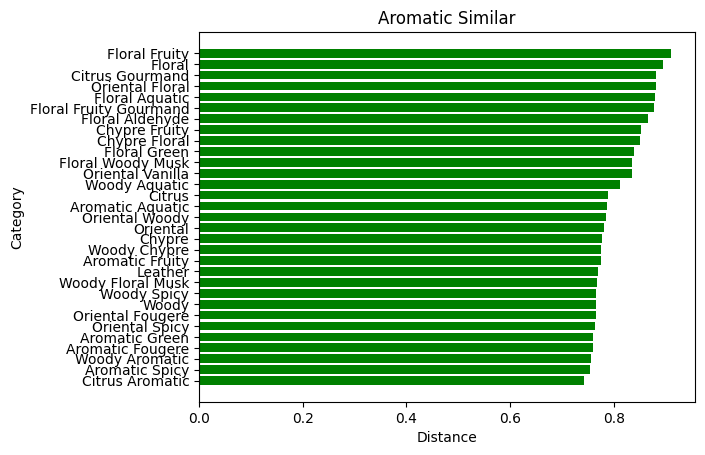

In [12]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Aromatic Similar')  # 그래프 제목

plt.show()  

In [13]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Chypre", matrix,32)# 유사한 향기 추천
dis

[0.7484143085424979,
 0.7573803666179003,
 0.7580290923409528,
 0.7610732292417475,
 0.7689395587391556,
 0.7731864972768268,
 0.7759836141621592,
 0.7780580184701459,
 0.7839426977178976,
 0.7872628023163744,
 0.7920969574858518,
 0.7934498072002742,
 0.7965936610613451,
 0.7969534061236152,
 0.8016023250922749,
 0.8021054573135971,
 0.8136102130736382,
 0.8193048311820705,
 0.8199011157353752,
 0.8221009681376503,
 0.838203104387931,
 0.8440183712739096,
 0.8514505352540626,
 0.8594576659175731,
 0.8622458676030695,
 0.8786039938488283,
 0.8819588758807503,
 0.8978846059361025,
 0.8980134071267503,
 0.9123587052759766,
 0.9140575651289533]

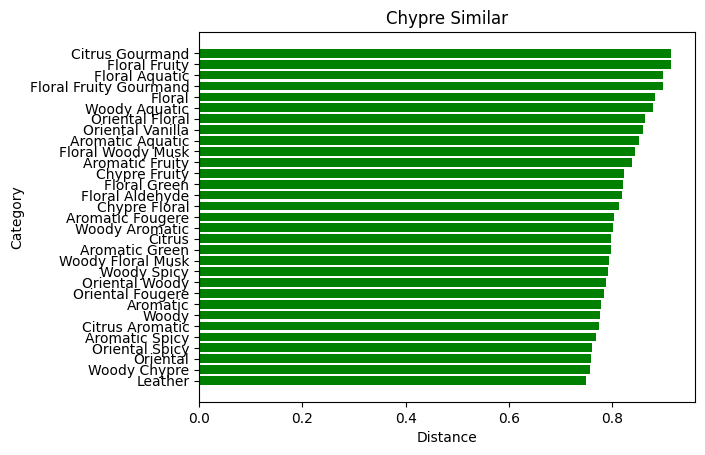

In [14]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Chypre Similar')  # 그래프 제목

plt.show()  

In [15]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Citrus", matrix,32)# 유사한 향기 추천
similar_user_indices

['Citrus Aromatic',
 'Aromatic',
 'Chypre',
 'Woody',
 'Oriental',
 'Aromatic Green',
 'Woody Floral Musk',
 'Aromatic Spicy',
 'Aromatic Fruity',
 'Floral Green',
 'Oriental Spicy',
 'Leather',
 'Oriental Woody',
 'Woody Chypre',
 'Woody Spicy',
 'Oriental Fougere',
 'Woody Aromatic',
 'Aromatic Aquatic',
 'Aromatic Fougere',
 'Oriental Vanilla',
 'Chypre Floral',
 'Floral Woody Musk',
 'Chypre Fruity',
 'Floral Aldehyde',
 'Floral Aquatic',
 'Woody Aquatic',
 'Oriental Floral',
 'Floral Fruity Gourmand',
 'Citrus Gourmand',
 'Floral',
 'Floral Fruity']

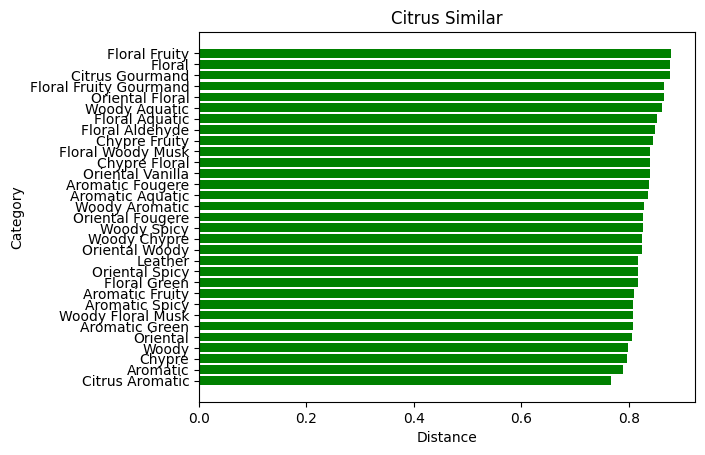

In [16]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Citrus Similar')  # 그래프 제목

plt.show()  

In [17]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Floral", matrix,32)# 유사한 향기 추천
similar_user_indices

['Floral Woody Musk',
 'Floral Fruity',
 'Oriental Floral',
 'Chypre Floral',
 'Floral Green',
 'Oriental Vanilla',
 'Floral Aldehyde',
 'Floral Fruity Gourmand',
 'Floral Aquatic',
 'Chypre Fruity',
 'Oriental',
 'Oriental Spicy',
 'Citrus',
 'Chypre',
 'Aromatic Fruity',
 'Citrus Aromatic',
 'Oriental Woody',
 'Aromatic',
 'Citrus Gourmand',
 'Aromatic Green',
 'Woody',
 'Woody Floral Musk',
 'Woody Chypre',
 'Aromatic Spicy',
 'Leather',
 'Aromatic Aquatic',
 'Oriental Fougere',
 'Woody Aromatic',
 'Woody Aquatic',
 'Woody Spicy',
 'Aromatic Fougere']

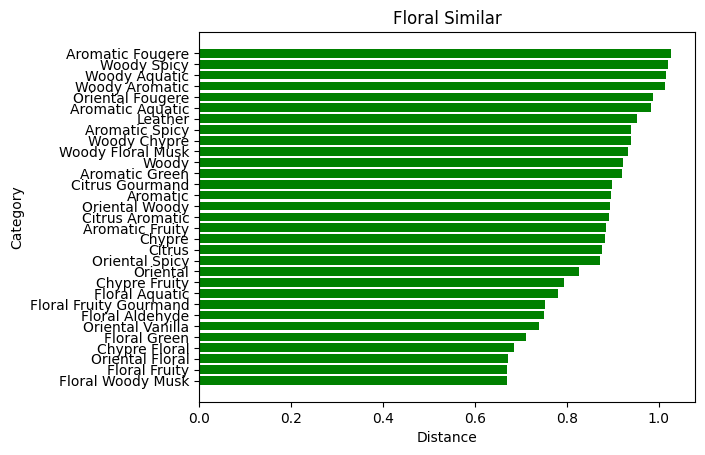

In [18]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Floral Similar')  # 그래프 제목

plt.show()  

In [19]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Leather", matrix,32)# 유사한 향기 추천
similar_user_indices

['Woody Spicy',
 'Woody Chypre',
 'Oriental Spicy',
 'Woody Aromatic',
 'Oriental Woody',
 'Oriental Fougere',
 'Woody Floral Musk',
 'Woody',
 'Oriental',
 'Aromatic Fougere',
 'Citrus Aromatic',
 'Chypre',
 'Aromatic Spicy',
 'Aromatic',
 'Aromatic Green',
 'Aromatic Aquatic',
 'Woody Aquatic',
 'Citrus',
 'Aromatic Fruity',
 'Chypre Fruity',
 'Oriental Vanilla',
 'Chypre Floral',
 'Floral Woody Musk',
 'Floral Green',
 'Floral Aldehyde',
 'Oriental Floral',
 'Citrus Gourmand',
 'Floral Fruity Gourmand',
 'Floral Aquatic',
 'Floral',
 'Floral Fruity']

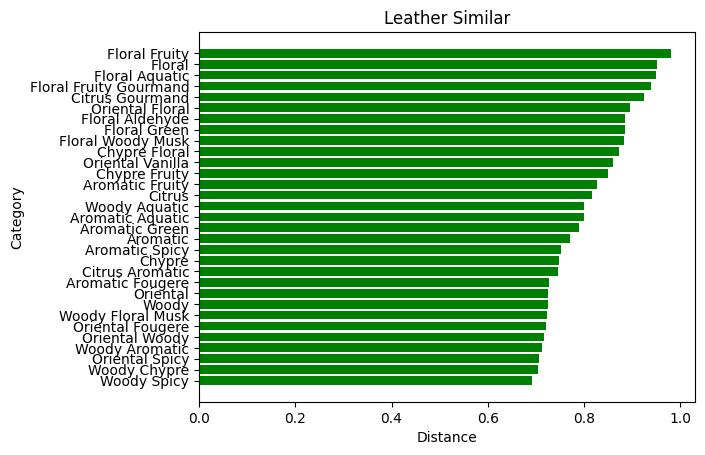

In [20]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Leather Similar')  # 그래프 제목

plt.show()  

In [21]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Oriental", matrix,32)# 유사한 향기 추천
similar_user_indices

['Oriental Woody',
 'Oriental Spicy',
 'Leather',
 'Oriental Vanilla',
 'Citrus Aromatic',
 'Chypre',
 'Woody',
 'Woody Floral Musk',
 'Woody Spicy',
 'Oriental Fougere',
 'Chypre Floral',
 'Oriental Floral',
 'Floral Woody Musk',
 'Woody Aromatic',
 'Aromatic',
 'Woody Chypre',
 'Aromatic Spicy',
 'Chypre Fruity',
 'Floral Green',
 'Floral Aldehyde',
 'Citrus',
 'Aromatic Fougere',
 'Aromatic Fruity',
 'Floral',
 'Aromatic Green',
 'Floral Fruity Gourmand',
 'Aromatic Aquatic',
 'Floral Aquatic',
 'Woody Aquatic',
 'Floral Fruity',
 'Citrus Gourmand']

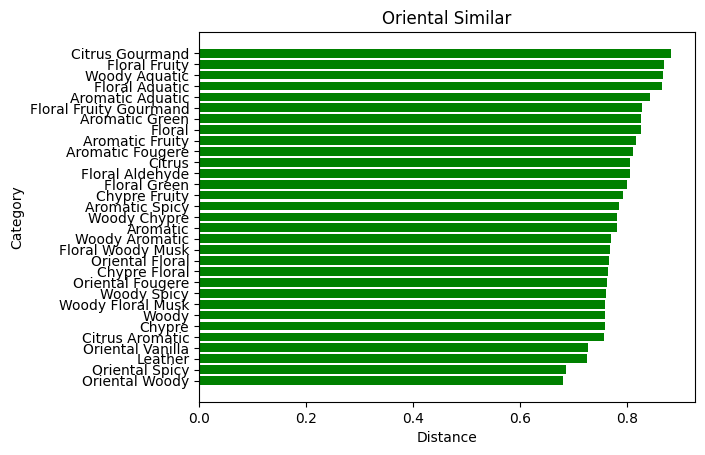

In [22]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Oriental Similar')  # 그래프 제목

plt.show()  

In [23]:
def similar_category(id, matrix, k):
    model_knn = NearestNeighbors(metric = 'correlation', algorithm = 'brute')#피어슨 유사도 계산
    model_knn.fit(matrix)#모델 학습

    query_index = matrix.index.get_loc(id)# 유사도 대상 쿼리 인덱스
        
    KN = matrix.iloc[query_index].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(KN, n_neighbors = k)#인접한 k개의 sample에 대한 거리 index 반환

    Rec_Category = list()# 유사한 향기 저장
    dis = list()# 유사한 향기 거리 저장
        
    for i in range(1, len(distances.flatten())):# 유사한 향기 개수만큼 반복
        Rec_Category.append(matrix.index[indices.flatten()[i]])# 유사한 향기 리스트 저장
        dis.append(distances.flatten()[i])# 유사한 향기 거리 리스트 저장

    return Rec_Category, dis# 유사한 향기 반환

similar_user_indices, dis = similar_category("Woody", matrix,32)# 유사한 향기 추천
similar_user_indices

['Leather',
 'Woody Spicy',
 'Woody Aromatic',
 'Oriental Spicy',
 'Oriental Woody',
 'Oriental Fougere',
 'Woody Chypre',
 'Aromatic Spicy',
 'Citrus Aromatic',
 'Woody Floral Musk',
 'Aromatic Fougere',
 'Oriental',
 'Aromatic',
 'Chypre',
 'Aromatic Green',
 'Citrus',
 'Aromatic Aquatic',
 'Woody Aquatic',
 'Aromatic Fruity',
 'Oriental Vanilla',
 'Chypre Fruity',
 'Floral Woody Musk',
 'Chypre Floral',
 'Floral Green',
 'Floral Aldehyde',
 'Oriental Floral',
 'Citrus Gourmand',
 'Floral Aquatic',
 'Floral Fruity Gourmand',
 'Floral',
 'Floral Fruity']

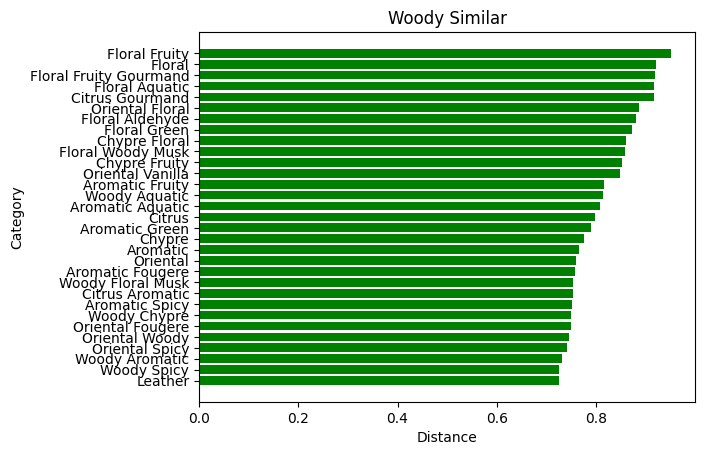

In [24]:
plt.barh(similar_user_indices, dis, color ='green')

plt.xlabel('Distance')  # X축 레이블
plt.ylabel('Category')  # Y축 레이블
plt.title('Woody Similar')  # 그래프 제목

plt.show()  